In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
dados = pd.read_csv('students_peformance.csv')
dados.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
#removendo colunas StudentID, GradeClass
dados.drop(columns=['StudentID'], inplace=True)

#tabela de correlacao
dados.corr().style.background_gradient(cmap='coolwarm')


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


In [4]:
#ordernando as variaveis com maior correlacao
correlacao = dados.corr()
gpa_correlacao = correlacao['GPA'].sort_values(ascending=False)
gpa_correlacao


GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
Gender              -0.013360
ParentalEducation   -0.035854
GradeClass          -0.782835
Absences            -0.919314
Name: GPA, dtype: float64

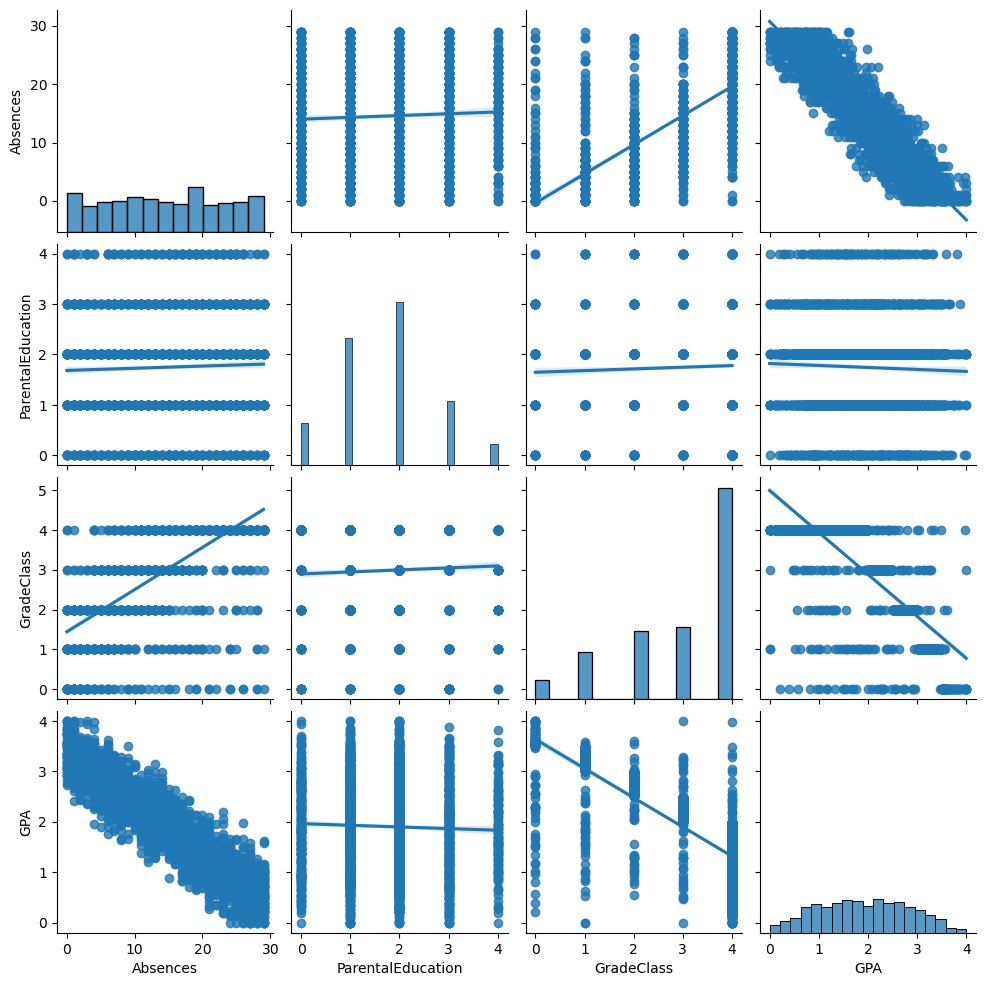

In [5]:
#plotando grafico de correlacao das colunas Absences, ParentalEducation   e GPA
sns.pairplot(dados, vars=['Absences', 'ParentalEducation', 'GradeClass', 'GPA'], kind='reg') #kind='reg' mostra a linha de regressao 
plt.show()


In [26]:
X = dados[['ParentalSupport', 'StudyTimeWeekly', 'Tutoring', 'Absences']]  # Variáveis independentes
#X = dados[['Absences', 'ParentalEducation', 'GradeClass']]
y = dados['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
rmse, r2


c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.24405912066096527, 0.9268593290170203)

C:\Users\alyss\AppData\Local\Temp\ipykernel_15100\2304803699.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='r')


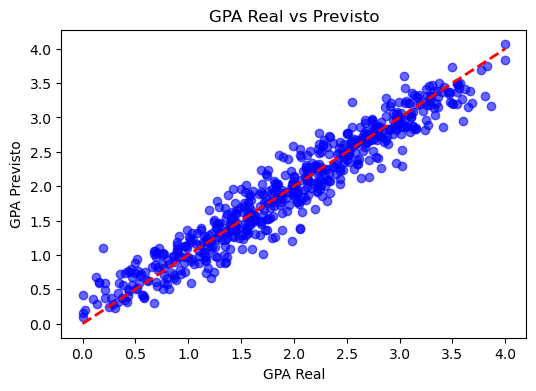

In [24]:
# Gráfico real vs predito (Predicted vs Actual)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, c='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='r')	
plt.xlabel('GPA Real')
plt.ylabel('GPA Previsto')
plt.title('GPA Real vs Previsto')
plt.show()

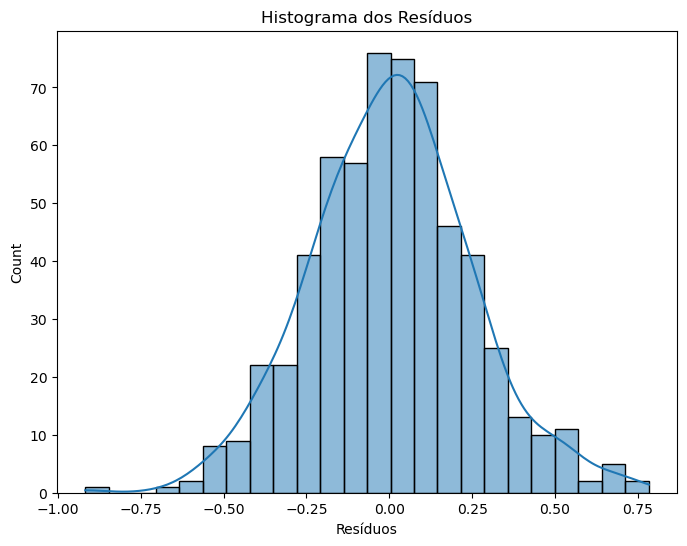

In [27]:
# Histograma dos resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()